There are two major intermidiate steps when solving chess problem:
1. Move Chess:

>> Objective: find the shortest path between 2 spots on a chess board

>> Motivation: Move Chess effectively

2. Capture Chess

>> Objective: capture as many pieces from the opponent within centain fullmoves

>> Motivation: Piece captures as one way of reward.


Today we focus on Move chess

# Load and Import Package

In [1]:
!pip install --upgrade git+https://github.com/arjangroen/RLC.git 
!pip install python-chess  
# Python-Chess is the Python Chess Package that handles the chess environment

  Cloning https://github.com/arjangroen/RLC.git to /tmp/pip-req-build-eacof5e4
  Running command git clone -q https://github.com/arjangroen/RLC.git /tmp/pip-req-build-eacof5e4
  Created wheel for RLC: filename=RLC-0.3-cp36-none-any.whl size=22566 sha256=a664e58351d810c51a88b285dcf07418a5bfc565fc0f807f9f2e9c6c78d93e28
  Stored in directory: /tmp/pip-ephem-wheel-cache-drkzyoce/wheels/04/68/a5/cb835cd3d76a49de696a942739c71a56bfe66d0d8ea7b4b446
Successfully built RLC


In [2]:
from RLC.move_chess.environment import Board
from RLC.move_chess.agent import Piece
from RLC.move_chess.learn import Reinforce
import inspect
import numpy as np

In [3]:
env = Board()
env.render()
env.visual_board 

[['[S]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[ ]'],
 ['[ ]', '[ ]', '[ ]', '[ ]', '[ ]', '[F]', '[ ]', '[ ]']]

# King (One Step)


In [ ]:
# Radom Walk
eva1 = []
for i in range(50):
  #r.policy_iteration()
  p = Piece(piece='king') # select a chess agent (knight, bishop or rook)
  env = Board() # 8*8 chess board
  r = Reinforce(p,env) 
  states, actions, rewards = r.play_episode(state = (0,0), 
                                            max_steps=1e3, epsilon=0.1)
  eva1.append(len(actions))

# Monte Carlo Control¶

We do not know the environment, so we sample an episode from beginning to end by running our current policy
We try to estimate the action-values rather than the state values. This is because we are working model-free so just knowning state values won't help us select the best actions.
The value of a state-action value is defined as the future returns from the first visit of that state-action
Based on this we can improve our policy and repeat the process untill the algorithm converges



Choose optimal hyperparameters for Monte Carlo
There are two hyperparameters:

eps = [0,1]; 
iteration = 

In this case, we use king as the agent to evaluate minimal number of steps it takes from (0,0) to (5, 7), The true minimal step is 8. Here is the line chart of estimiate minial steps vs hyperparameters value.

In [34]:
eps_eva = dict()
eps = [0.001, 0.005, 0.01, 0.05, 0.1]
iteration = [100] #[100, 500, 1000]
for e in eps:
  total_steps = []
  for iter in iteration:
    for i in range (50):
      p = Piece(piece='king') # select a chess agent (knight, bishop or rook)
      env = Board() # 8*8 chess board
      r = Reinforce(p,env)
      for k in range(iter):
        r.monte_carlo_learning(epsilon=e)
      states, actions, rewards = r.play_episode(state = (0,0), 
                                            max_steps=1e3, epsilon=0.1)
      total_steps.append(len(actions))
    eps_eva[e] = np.mean(total_steps)
  

In [36]:
eps_eva

{0.001: 213.48, 0.005: 17.16, 0.01: 21.06, 0.05: 18.22, 0.1: 23.12}

In [49]:
iter_eva = dict()
eps = [0.1]#[0.01, 0.05, 0.1, 0.2, 0.3]
iteration = [10, 50, 100, 500, 1000]
for e in eps:
  total_steps = []
  for iter in iteration:
    for i in range (50):
      p = Piece(piece='king') # select a chess agent (knight, bishop or rook)
      env = Board() # 8*8 chess board
      r = Reinforce(p,env)
      for k in range(iter):
        r.monte_carlo_learning(epsilon=e)
      states, actions, rewards = r.play_episode(state = (0,0), 
                                            max_steps=1e3, epsilon=0.1)
      total_steps.append(len(actions))
    iter_eva[iter] = np.mean(total_steps)

In [50]:
iter_eva

{10: 156.94, 50: 91.69, 100: 67.17333333333333, 500: 53.855, 1000: 46.34}

[Text(0, 0.5, 'NO. of Steps')]

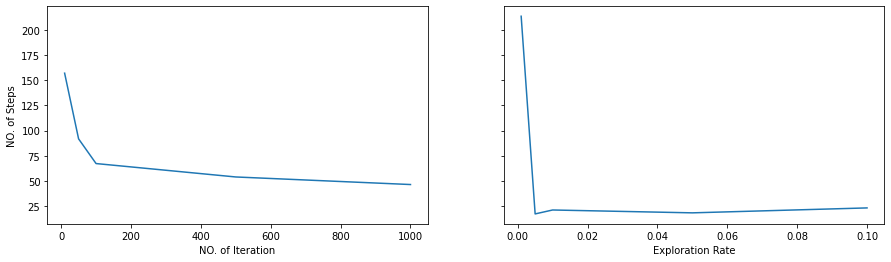

In [66]:
import matplotlib.pyplot as plt
iter = list(iter_eva.keys())          
min_steps1 = list(iter_eva.values())

eps = list(eps_eva.keys())          
min_steps2 = list(eps_eva.values()) 


fig, (ax1, ax2) = plt.subplots(1, 2, sharex=False, sharey=True,)
ax1.plot(iter,min_steps1)
ax2.plot(eps,min_steps2)
fig.set_figwidth(15)
plt.setp([ax1], xlabel='NO. of Iteration')
plt.setp([ax2], xlabel='Exploration Rate')
plt.setp([ax1], ylabel='NO. of Steps')
#fig.suptitle("Hyper-parameters in Monte Carlo")#
#plt.ylim(0, 50) 

In [51]:
total_steps = []

for i in range (1000):
  p = Piece(piece='king') # select a chess agent (knight, bishop or rook)
  env = Board() # 8*8 chess board
  r = Reinforce(p,env)
  for k in range(100):
    r.monte_carlo_learning(epsilon=e)
  states, actions, rewards = r.play_episode(state = (0,0), 
                                            max_steps=1e3, epsilon=0.1)
  total_steps.append(len(actions))

In [56]:
total_steps = total_steps[250:]

Text(0.5, 0, 'NO. of Steps')

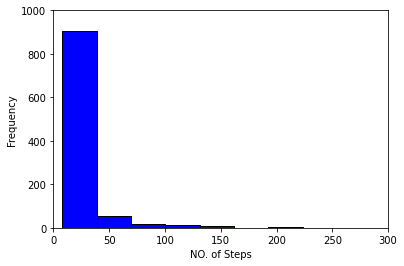

In [71]:
plt.hist(total_steps, color = 'blue', edgecolor = 'black')
plt.ylim(0, 1000) 
plt.xlim(0, 300) 
plt.ylabel('Frequency')
plt.xlabel('NO. of Steps')